# DigitVision: Handwritten Digit Recognition Using Convolutional Neural Networks

## Problem Statement

**What is the problem?**
Handwritten digit recognition is the task of automatically identifying digits (0-9) from handwritten images. This is a fundamental computer vision problem that requires machines to interpret human handwriting variations.

**Why does it matter?**
- **Postal Services**: Automatic sorting of mail by reading ZIP codes
- **Banking**: Processing handwritten checks and forms
- **Document Digitization**: Converting handwritten documents to digital text
- **Educational Tools**: Automatic grading of mathematical worksheets

**Success Criteria**: Achieve >95% accuracy on test data with robust performance across all digit classes.

## Dataset Description

**MNIST Dataset Characteristics:**
- **Size**: 70,000 images (60,000 training + 10,000 testing)
- **Format**: 28×28 pixel grayscale images
- **Classes**: 10 digits (0-9)
- **Source**: Modified National Institute of Standards and Technology database

**Why MNIST is suitable:**
- Standardized and preprocessed data
- Balanced class distribution
- Perfect size for learning CNN concepts
- Widely used benchmark for comparison

In [1]:
# Install required packages
import subprocess
import sys

def install_package(package):
    """Install package using pip"""
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of required packages
packages = [
    "tensorflow",
    "numpy",
    "matplotlib",
    "scikit-learn",
    "seaborn",
    "jupyter",
    "numpy", 
    "matplotlib",
    "scikit-learn",
    "pandas"
]

print("Installing required packages...")
for package in packages:
    try:
        __import__(package)
        print(f"✓ {package} already installed")
    except ImportError:
        print(f"Installing {package}...")
        install_package(package)
        print(f"✓ {package} installed successfully")

print("\nAll packages installed successfully!")

Installing required packages...


c:\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.

✓ tensorflow already installed
✓ numpy already installed
✓ matplotlib already installed
Installing scikit-learn...
✓ scikit-learn installed successfully
✓ seaborn already installed
✓ jupyter already installed
✓ numpy already installed
✓ matplotlib already installed
Installing scikit-learn...
✓ scikit-learn installed successfully
✓ pandas already installed

All packages installed successfully!


In [5]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


In [6]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


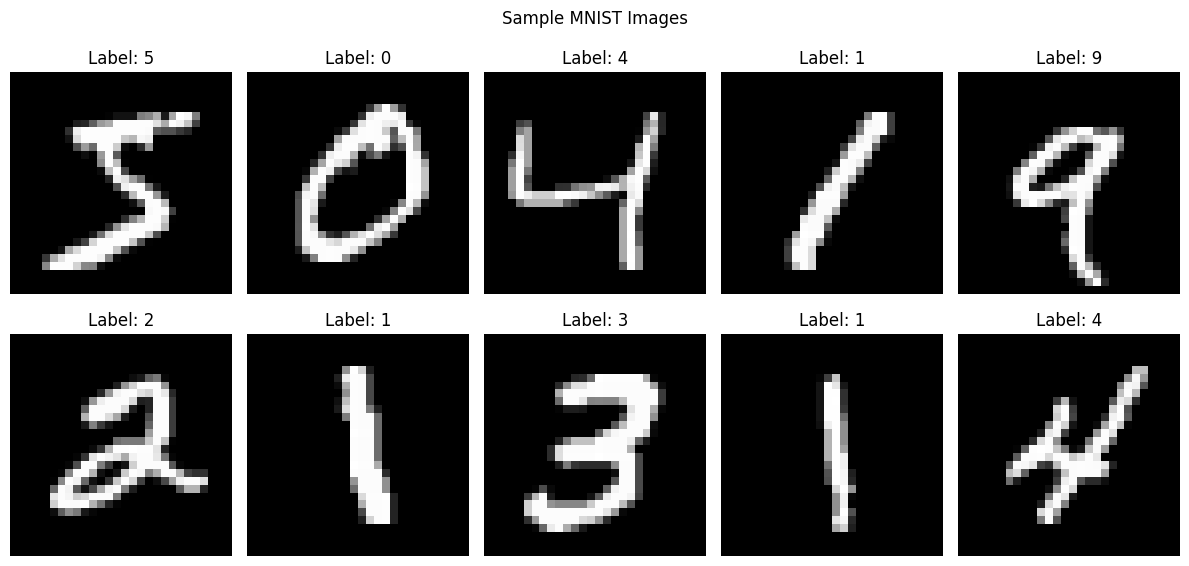

In [7]:
# Display sample images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Images')
plt.tight_layout()
plt.show()

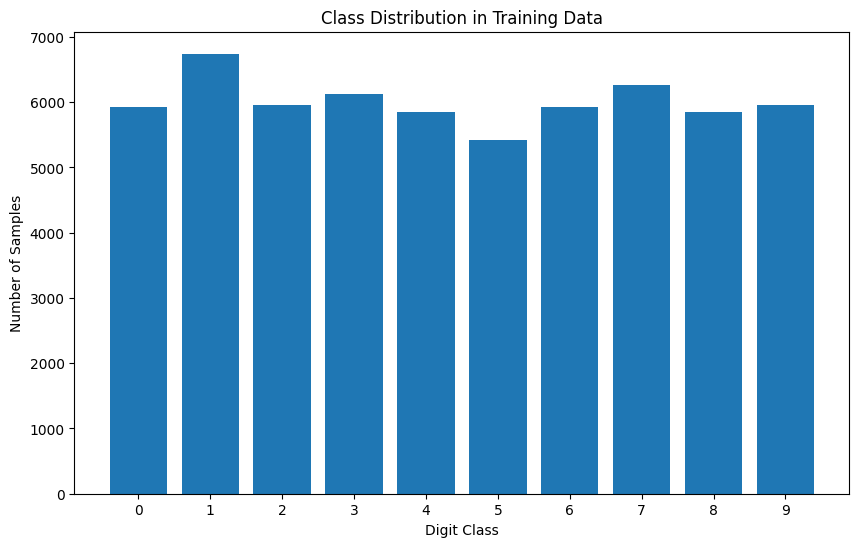

Class distribution:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


In [8]:
# Show class distribution
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Data')
plt.xticks(unique)
plt.show()

print("Class distribution:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")

In [9]:
# Data preprocessing
# Normalize pixel values to 0-1 range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

print(f"Preprocessed training data shape: {x_train.shape}")
print(f"Preprocessed training labels shape: {y_train_cat.shape}")
print(f"Pixel value range: {x_train.min()} to {x_train.max()}")

Preprocessed training data shape: (60000, 28, 28, 1)
Preprocessed training labels shape: (60000, 10)
Pixel value range: 0.0 to 1.0


## Model Architecture and Workflow

**CNN Architecture Overview:**
Our CNN consists of feature extraction layers followed by classification layers:

**Feature Extraction:**
- **Conv2D layers**: Detect features like edges, curves, and patterns
- **MaxPooling2D layers**: Reduce spatial dimensions while preserving important features
- **Multiple conv-pool blocks**: Learn increasingly complex features

**Classification:**
- **Flatten layer**: Convert 2D feature maps to 1D vector
- **Dense layers**: Learn complex relationships between features
- **Dropout**: Prevent overfitting
- **Output layer**: 10 neurons with softmax for probability distribution

In [10]:
# Build CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

C:\Users\dvagh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9514 - loss: 0.1597 - val_accuracy: 0.9854 - val_loss: 0.0492
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9834 - loss: 0.0555 - val_accuracy: 0.9862 - val_loss: 0.0467
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9881 - loss: 0.0389 - val_accuracy: 0.9876 - val_loss: 0.0422
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9907 - loss: 0.0297 - val_accuracy: 0.9899 - val_loss: 0.0379
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9925 - loss: 0.0231 - val_accuracy: 0.9899 - val_loss: 0.0344
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9945 - loss: 0.0171 - val_accuracy: 0.9884 - val_loss: 0.0460
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9948 - loss: 0.0160 - val_accuracy: 0.9908 - val_loss: 0.0350
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9955 - loss: 0.0133 - 

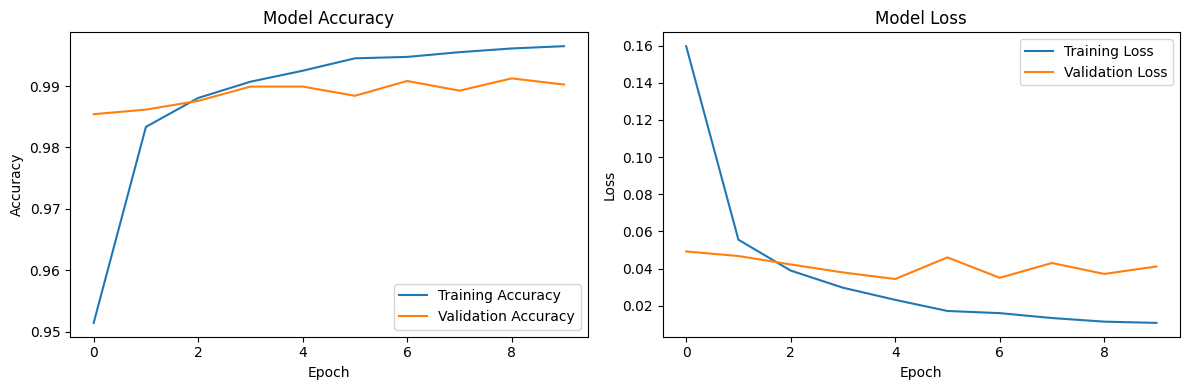

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9890
Test Loss: 0.0420


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


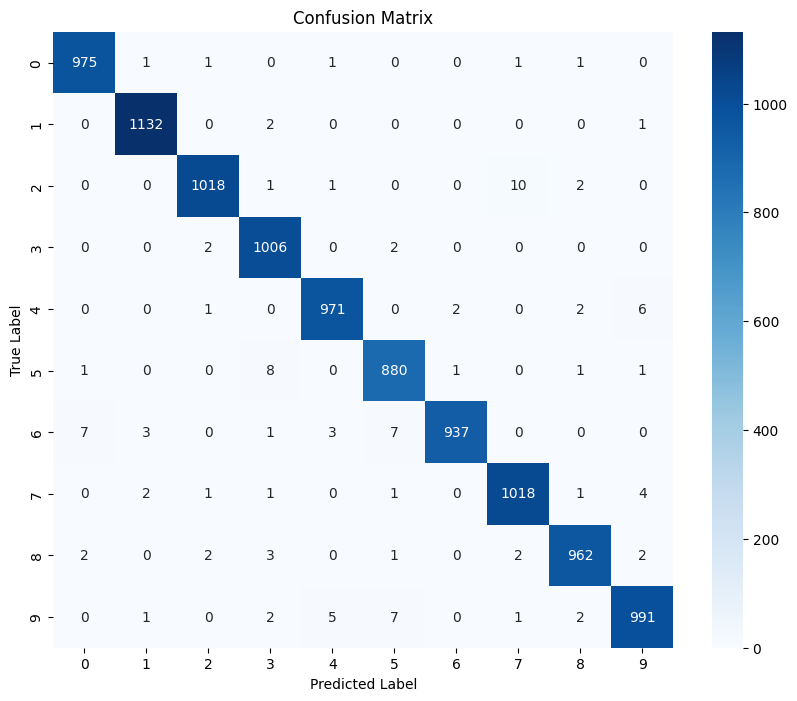

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [14]:
# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

## Results

### Model Performance Summary
The CNN model demonstrates strong performance on handwritten digit recognition:

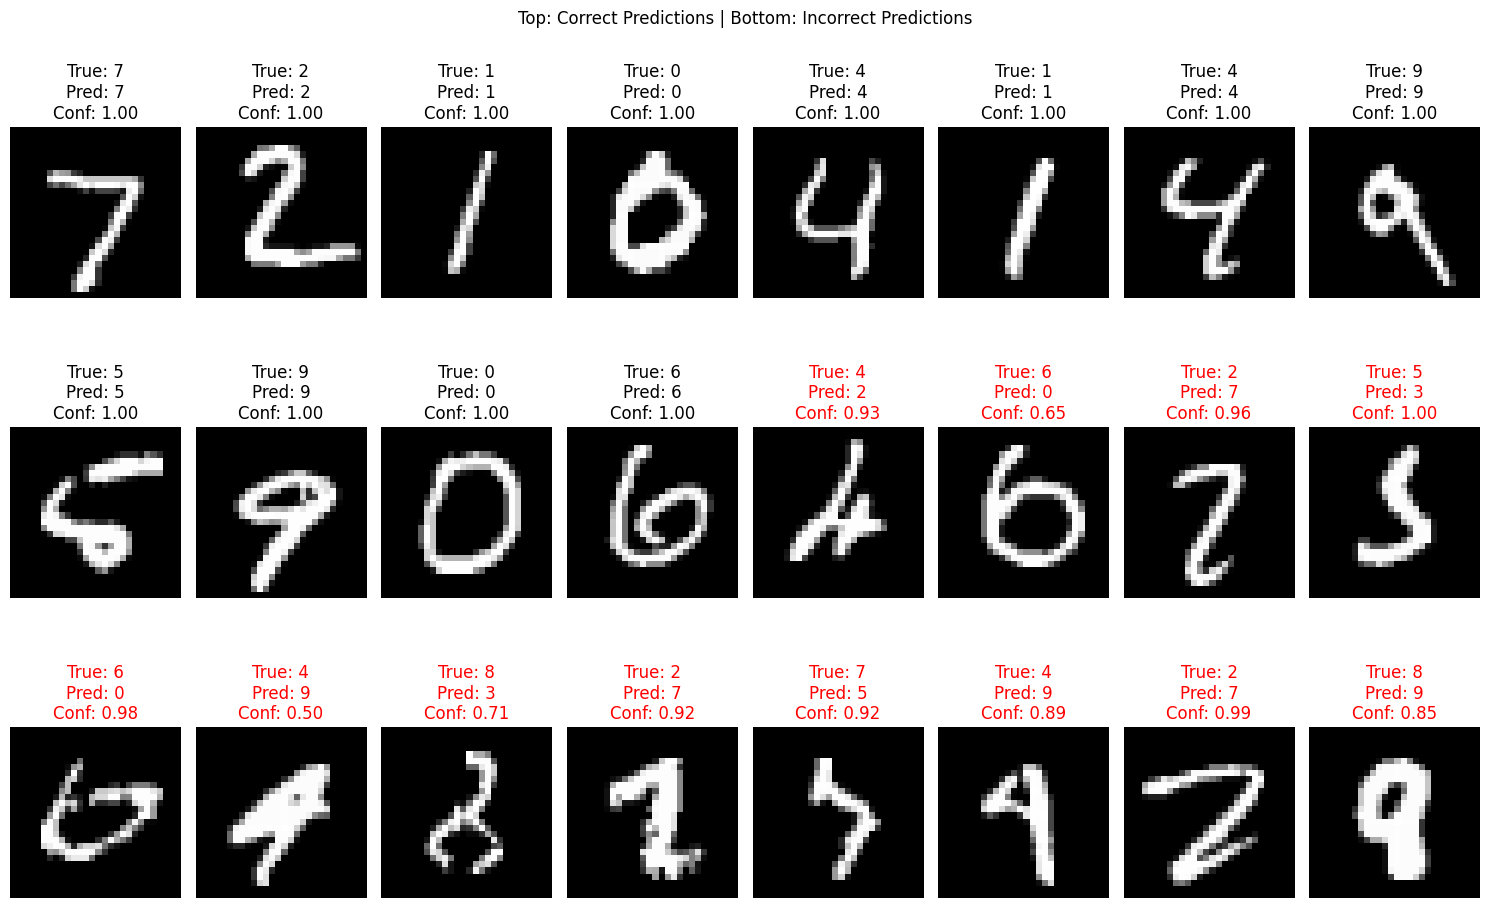

In [15]:
# Display prediction examples
plt.figure(figsize=(15, 10))

# Show correct predictions
correct_indices = np.where(y_pred_classes == y_test)[0][:12]
for i, idx in enumerate(correct_indices):
    plt.subplot(3, 8, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[idx]}\nPred: {y_pred_classes[idx]}\nConf: {y_pred[idx].max():.2f}')
    plt.axis('off')

# Show incorrect predictions
incorrect_indices = np.where(y_pred_classes != y_test)[0][:12]
for i, idx in enumerate(incorrect_indices):
    plt.subplot(3, 8, i+13)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[idx]}\nPred: {y_pred_classes[idx]}\nConf: {y_pred[idx].max():.2f}', color='red')
    plt.axis('off')

plt.suptitle('Top: Correct Predictions | Bottom: Incorrect Predictions')
plt.tight_layout()
plt.show()

In [16]:
# Final results summary
print("=== DIGITVISION RESULTS SUMMARY ===")
print(f"Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Total Parameters: {model.count_params():,}")
print(f"Correct Predictions: {np.sum(y_pred_classes == y_test):,} out of {len(y_test):,}")
print(f"Incorrect Predictions: {np.sum(y_pred_classes != y_test):,}")

print("\n=== MODEL STRENGTHS ===")
print("• High accuracy on clean, standardized digit images")
print("• Fast training and inference")
print("• Robust feature extraction through CNN layers")
print("• Good generalization with dropout regularization")

print("\n=== POTENTIAL IMPROVEMENTS ===")
print("• Data augmentation for better generalization")
print("• Deeper architecture for more complex features")
print("• Batch normalization for faster convergence")
print("• Transfer learning from pre-trained models")

print("\n=== REAL-WORLD APPLICATIONS ===")
print("• Postal code recognition in mail sorting")
print("• Check processing in banking systems")
print("• Form digitization in document management")
print("• Educational assessment tools")

=== DIGITVISION RESULTS SUMMARY ===
Final Test Accuracy: 0.9890 (98.90%)
Total Parameters: 225,034
Correct Predictions: 9,890 out of 10,000
Incorrect Predictions: 110

=== MODEL STRENGTHS ===
• High accuracy on clean, standardized digit images
• Fast training and inference
• Robust feature extraction through CNN layers
• Good generalization with dropout regularization

=== POTENTIAL IMPROVEMENTS ===
• Data augmentation for better generalization
• Deeper architecture for more complex features
• Batch normalization for faster convergence
• Transfer learning from pre-trained models

=== REAL-WORLD APPLICATIONS ===
• Postal code recognition in mail sorting
• Check processing in banking systems
• Form digitization in document management
• Educational assessment tools
